<a href="https://colab.research.google.com/github/Frost-04/ML-model-on-F1-Dataset-to-predict-podium-using-SVM/blob/main/Formula_1_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Dataset

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [73]:
!wget -O results.csv "https://drive.google.com/uc?id=1jvzxG-lDm9AZ6g8vrmy8YknCbmMsmifN"
!wget -O driver_standings.csv "https://drive.google.com/uc?id=1cDTw95ehqpC8UksDLspQreogYKQCOi0n"
file_path = '/content/results.csv'
results = pd.read_csv(file_path)
file_path = '/content/driver_standings.csv'
driver_standings=pd.read_csv(file_path)


--2024-12-13 18:37:07--  https://drive.google.com/uc?id=1jvzxG-lDm9AZ6g8vrmy8YknCbmMsmifN
Resolving drive.google.com (drive.google.com)... 142.251.184.101, 142.251.184.113, 142.251.184.100, ...
Connecting to drive.google.com (drive.google.com)|142.251.184.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jvzxG-lDm9AZ6g8vrmy8YknCbmMsmifN [following]
--2024-12-13 18:37:07--  https://drive.usercontent.google.com/download?id=1jvzxG-lDm9AZ6g8vrmy8YknCbmMsmifN
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1717126 (1.6M) [application/octet-stream]
Saving to: ‘results.csv’

results.csv         100%[===================>]   1.64M  --.-KB/s    in 0.01s   

2024-12-13 18:37:09 (158 MB/

# Results table pre-processing

In [74]:
print("NULL check:------\n")
print(results.isnull().sum())
print("Data types check:------\n")
print(results.dtypes)
results

NULL check:------

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64
Data types check:------

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,26700,1141,832,6,55,0,\N,R,16,0.0,38,\N,\N,19,17,1:24.201,184.230,3
26695,26701,1141,861,3,43,16,\N,R,17,0.0,30,\N,\N,21,18,1:24.296,184.022,3
26696,26702,1141,848,3,23,7,\N,W,18,0.0,0,\N,\N,\N,0,\N,\N,54
26697,26703,1141,840,117,18,10,\N,W,19,0.0,0,\N,\N,\N,0,\N,\N,54


In [75]:
# Function to convert fastestLapTime string to seconds
def convert_to_seconds(value):
    if value == r'\N':  # Handle null values
        return np.nan
    minutes, seconds = map(float, value.split(':'))
    return minutes * 60 + seconds

# Apply the function to the column
results['fastestLapTime'] = results['fastestLapTime'].apply(convert_to_seconds)
# Ensure the column is of type float
results['fastestLapTime'] = results['fastestLapTime'].astype(float)

# milliseconds to seconds
results['milliseconds'] = results['milliseconds'].replace(r'\\N', np.nan, regex=True)
# Convert the column to numeric (this will convert invalid values to NaN)
results['milliseconds'] = pd.to_numeric(results['milliseconds'], errors='coerce')
# Convert milliseconds to seconds (float)
results['milliseconds'] = results['milliseconds'] / 1000
# Ensure the column is of type float
results['milliseconds'] = results['milliseconds'].astype(float)

#Convert number to integer
results['number'] = results['number'].replace(r'\\N', np.nan, regex=True)
results['number'] = results['number'].astype(float)
results = results.dropna(subset=['number'])


#convert fastestLapSpeed to float
results['fastestLapSpeed'] = results['fastestLapSpeed'].replace(r'\\N', np.nan, regex=True)
results['fastestLapSpeed'] = results['fastestLapSpeed'].astype(float)

#convert Rank to number
results['rank'] = results['rank'].replace(r'\\N', np.nan, regex=True)
results['rank'] = pd.to_numeric(results['rank'], errors='coerce')

#convert fastestLap to number
results['fastestLap'] = results['fastestLap'].replace(r'\\N', np.nan, regex=True)
results['fastestLap'] = pd.to_numeric(results['fastestLap'], errors='coerce')


#Dropping irrelevant and derived columns and renaming properly
results = results.drop(columns=['position','positionText','time'])
results = results.rename(columns={'positionOrder': 'Position', 'milliseconds': 'completionTime'})
#Dropping because 80% values are NaN 18k+ rows
#results = results.drop(columns=['rank','constructorId', 'number'])


<ipython-input-75-c8efb4213d1b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['fastestLapSpeed'] = results['fastestLapSpeed'].replace(r'\\N', np.nan, regex=True)
<ipython-input-75-c8efb4213d1b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['fastestLapSpeed'] = results['fastestLapSpeed'].astype(float)
<ipython-input-75-c8efb4213d1b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [76]:
#Finding a candidate key for merging

#Checking if raceId and driverId together make a key
is_unique_combination = not results.duplicated(subset=['raceId', 'driverId']).any()
print("Is the combination of columns 'A' and 'B' unique?", is_unique_combination , '\n')

#finding duplicated rows in reference to raceId and driverId
print("Duplicated Rows are")
duplicates = results[results.duplicated(subset=['raceId', 'driverId'], keep=False)]
print(duplicates)

#Since there are 176 duplicated rows we can safely remove them
results = results[~results.duplicated(subset=['raceId', 'driverId'], keep=False)]

#Checking if raceId and driverId together make a key
is_unique_combination = not results.duplicated(subset=['raceId', 'driverId']).any()
print("\nIs the combination of columns 'A' and 'B' unique?", is_unique_combination)


Is the combination of columns 'A' and 'B' unique? False 

Duplicated Rows are
       resultId  raceId  driverId  constructorId  number  grid  Position  \
13188     13189     540       229             54    10.0     0        26   
13191     13192     540       229             57    23.0     0        29   
17362     17363     717       373            172     1.0     1         7   
17740     17741     733       465            172    48.0     0        22   
17743     17744     733       465             97    50.0     0        25   
...         ...     ...       ...            ...     ...   ...       ...   
20293     20296     770       479            118    12.0    10        14   
20294     20297     774       566            105    32.0    11         4   
20295     22372     746       475            170    38.0     8         3   
24297     24303     745       418            172    21.0    15        11   
24298     24304     717       373            172     2.0     1        12   

       po

In [77]:
results.describe()

,resultId,raceId,driverId,constructorId,number,grid,Position,points,laps,completionTime,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
count,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000,7618.000000,8195.000000,8450.000000,8195.000000,8195.000000,26517.000000
mean,13307.879474,548.705170,275.680695,49.833201,18.073425,11.146849,12.795716,1.990983,46.129464,6173.209927,42.722514,10.340118,90.833155,203.965808,17.185051
std,7717.027207,312.774559,281.769476,61.426839,15.503553,7.197765,7.665577,4.352474,29.122680,1638.609244,16.626873,6.142954,12.374142,21.364154,25.973839
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.526000,1.000000,0.000000,55.404000,89.540000,1.000000
25%,6630.000000,298.000000,57.000000,6.000000,7.000000,5.000000,6.000000,0.000000,23.000000,5381.298000,33.000000,5.000000,80.782500,193.250500,1.000000
50%,13261.000000,527.000000,170.000000,25.000000,16.000000,11.000000,12.000000,0.000000,53.000000,5789.590000,46.000000,10.000000,90.294000,204.783000,10.000000
75%,19976.000000,809.000000,385.000000,59.000000,24.000000,17.000000,18.000000,2.000000,66.000000,6399.354500,54.000000,15.000000,99.543000,217.083000,14.000000
max,26704.000000,1141.000000,861.000000,215.000000,208.000000,34.000000,39.000000,50.000000,200.000000,15090.540000,85.000000,24.000000,202.300000,257.320000,141.000000




---



Result pre-processing completed

## Pre-Processing Driver_Standings

In [78]:
print("NULL check:------\n")
print(driver_standings.isnull().sum())
print("\nData types:------")
print(driver_standings.dtypes)
driver_standings

NULL check:------

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

Data types:------
driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34788,73157,1141,832,244.0,5,5,2
34789,73156,1141,815,151.0,8,8,0
34790,73155,1141,830,393.0,1,1,8
34791,73176,1141,861,5.0,19,19,0


In [79]:
driver_standings = driver_standings.rename(columns={'points': 'totalPoints'})
driver_standings = driver_standings.rename(columns={'position': 'overallPosition'})

#Removing as its same as position
driver_standings=driver_standings.drop(columns=['positionText'])

In [80]:
driver_standings.describe()

#Finding key for merging tables
is_unique_combination = not driver_standings.duplicated(subset=['raceId', 'driverId']).any()

print("Is the combination of columns 'A' and 'B' unique?", is_unique_combination)

Is the combination of columns 'A' and 'B' unique? True



---
**BASIC PRE-PROCESSING COMPLETED**




## Merging Datasets

In [81]:
print(results.describe())
print("\n------------------------------\n")
print(driver_standings.describe())

           resultId        raceId      driverId  constructorId        number  \
count  26517.000000  26517.000000  26517.000000   26517.000000  26517.000000   
mean   13307.879474    548.705170    275.680695      49.833201     18.073425   
std     7717.027207    312.774559    281.769476      61.426839     15.503553   
min        1.000000      1.000000      1.000000       1.000000      0.000000   
25%     6630.000000    298.000000     57.000000       6.000000      7.000000   
50%    13261.000000    527.000000    170.000000      25.000000     16.000000   
75%    19976.000000    809.000000    385.000000      59.000000     24.000000   
max    26704.000000   1141.000000    861.000000     215.000000    208.000000   

               grid      Position        points          laps  completionTime  \
count  26517.000000  26517.000000  26517.000000  26517.000000     7618.000000   
mean      11.146849     12.795716      1.990983     46.129464     6173.209927   
std        7.197765      7.665577   

In [82]:
#common_columns = set(results.columns).intersection(set(drivers.columns))

#print("Common columns between results and drivers:", common_columns)

In [83]:
#result_driver_merge = pd.merge(results, drivers, on='driverId', how='inner')
#result_driver_merge

In [84]:
common_columns = set(results.columns).intersection(set(driver_standings.columns))

print("Common columns:", common_columns)

Common columns: {'raceId', 'driverId'}


In [85]:
datasetmain =pd.merge(results, driver_standings, on=['raceId','driverId'], how='inner')
datasetmain

,resultId,raceId,driverId,constructorId,number,grid,Position,points,laps,completionTime,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverStandingsId,totalPoints,overallPosition,wins
0,1,18,1,1,22.0,1,1,10.0,58,5690.616,39.0,2.0,87.452,218.300,1,1,10.0,1,1
1,2,18,2,2,3.0,5,2,8.0,58,5696.094,41.0,3.0,87.739,217.586,1,2,8.0,2,0
2,3,18,3,3,7.0,7,3,6.0,58,5698.779,41.0,5.0,88.090,216.719,1,3,6.0,3,0
3,4,18,4,4,5.0,11,4,5.0,58,5707.797,58.0,7.0,88.603,215.464,1,4,5.0,4,0
4,5,18,5,1,23.0,3,5,4.0,58,5708.630,43.0,1.0,87.418,218.385,1,5,4.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,26700,1141,832,6,55.0,0,16,0.0,38,NaN,19.0,17.0,84.201,184.230,3,73157,244.0,5,2
26044,26701,1141,861,3,43.0,16,17,0.0,30,NaN,21.0,18.0,84.296,184.022,3,73176,5.0,19,0
26045,26702,1141,848,3,23.0,7,18,0.0,0,NaN,NaN,0.0,NaN,NaN,54,73169,12.0,16,0
26046,26703,1141,840,117,18.0,10,19,0.0,0,NaN,NaN,0.0,NaN,NaN,54,73164,24.0,13,0


In [86]:
datasetmain = datasetmain.apply(lambda fastestLapTime: fastestLapTime.fillna(fastestLapTime.max()))
datasetmain = datasetmain.apply(lambda fastestLapSpeed: fastestLapSpeed.fillna(fastestLapSpeed.min()))
datasetmain = datasetmain.apply(lambda completionTime: completionTime.fillna(completionTime.max()))
datasetmain['podium'] = datasetmain['Position'].apply(lambda x: 1 if x <= 3 else -1)

datasetmain=datasetmain.dropna()

**Merging Completed**

# EDA

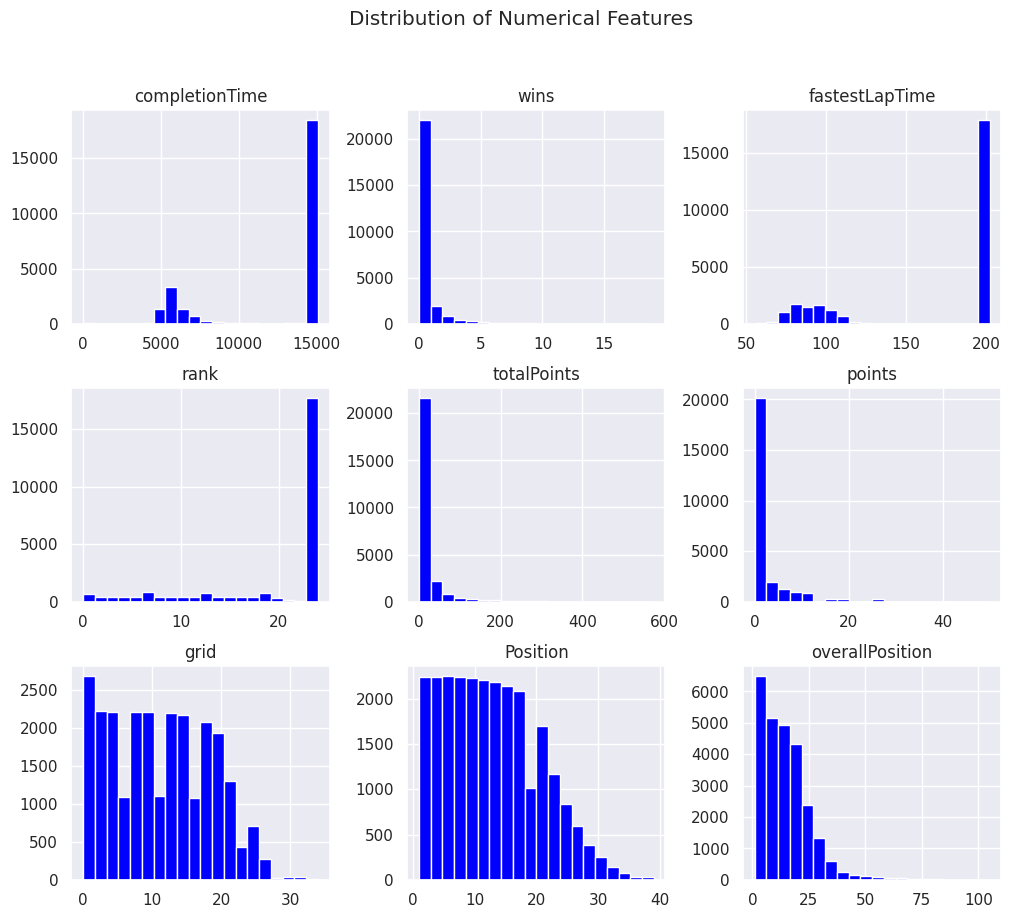

In [87]:
numeric_columns = ['completionTime', 'wins', 'fastestLapTime', 'rank','totalPoints', 'points', 'grid', 'Position','overallPosition']
datasetmain[numeric_columns].hist(bins=20, figsize=(12, 10), color='blue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

<Axes: >

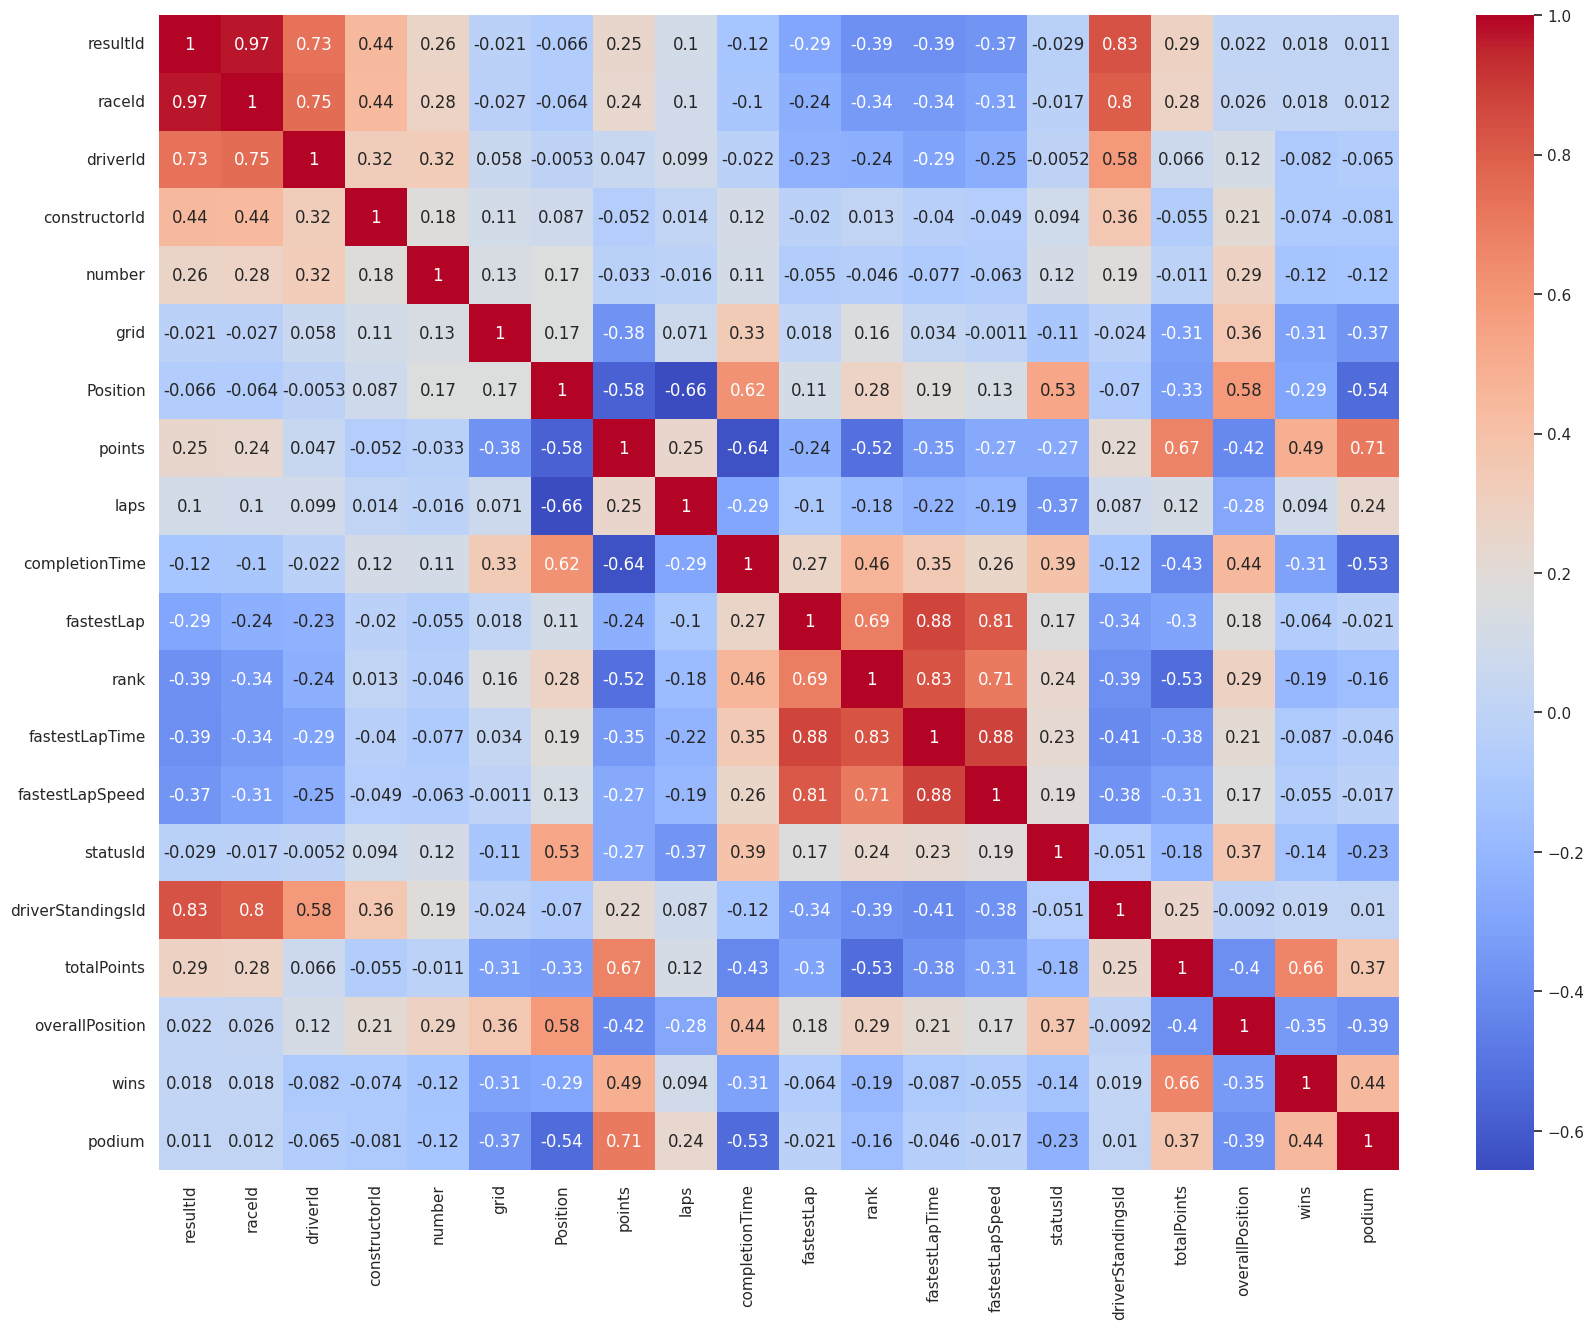

In [88]:
columns_to_exclude = ['podium']

# Separate the columns to scale and those to exclude
columns_to_scale = datasetmain.drop(columns_to_exclude, axis=1)
columns_excluded = datasetmain[columns_to_exclude]

#Scale only the selected columns
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(columns_to_scale)
scaled_columns_df = pd.DataFrame(scaled_columns, columns=columns_to_scale.columns)

#Combine scaled and unscaled columns
final_dataset = pd.concat([scaled_columns_df, columns_excluded], axis=1)
#final_dataset=final_dataset.drop(columns=['Position','overallPosition'])

# Plot the heatmap
sns.set(rc={'figure.figsize': (20, 15)})
sns.heatmap(final_dataset.corr(), annot=True, cmap='coolwarm')

<ipython-input-89-b510ad7d5da4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datasetmain, x='podium', palette='pastel', edgecolor='black')


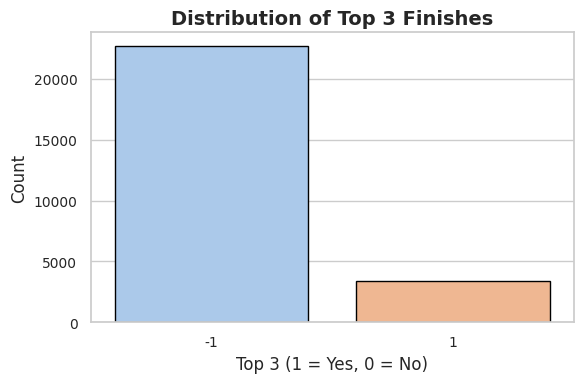

In [89]:
# Visualize target distribution
sns.set(style="whitegrid")  # Adds a clean, grid-like background for better readability

# Create the count plot
plt.figure(figsize=(6, 4))  # Smaller figure size for better presentation
sns.countplot(data=datasetmain, x='podium', palette='pastel', edgecolor='black')

# Customize the title and labels
plt.title("Distribution of Top 3 Finishes", fontsize=14, fontweight='bold')
plt.xlabel("Top 3 (1 = Yes, 0 = No)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjust the tick label font size for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Tight layout to prevent clipping of content
plt.tight_layout()

# Display the plot
plt.show()


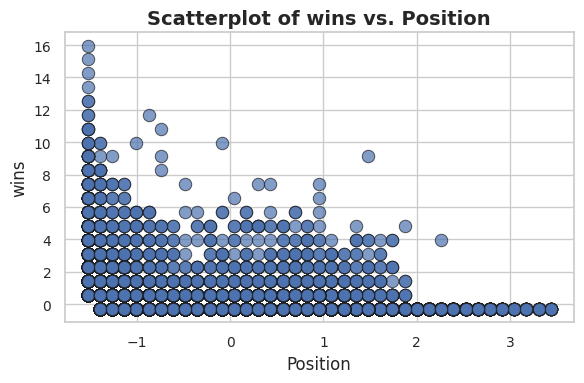

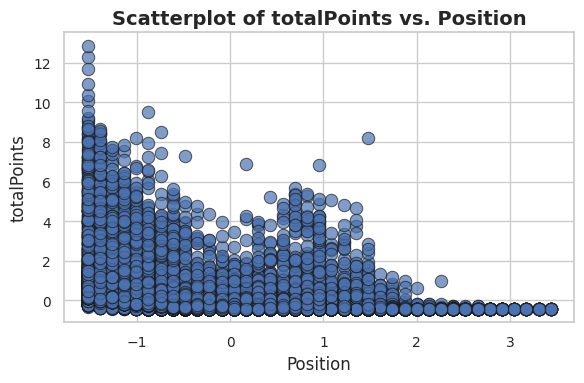

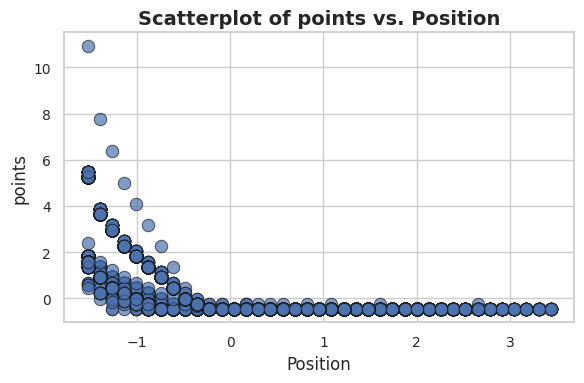

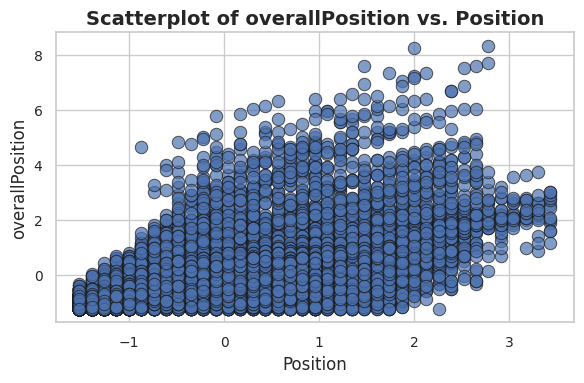

In [90]:
# List of columns to plot against 'Position'
columns_to_plot = [ 'wins', 'totalPoints', 'points', 'overallPosition']

# Set a more refined style for the plots
sns.set(style="whitegrid")  # Adds a clean, grid-like background for better readability

# Iterate through the list of specified columns
for col in columns_to_plot:
    plt.figure(figsize=(6, 4))  # Smaller figure size for better presentation
    sns.scatterplot(x='Position', y=col, data=final_dataset, color='b', edgecolor='k', s=80, alpha=0.7)  # Adjusting size and alpha for dots
    plt.title(f'Scatterplot of {col} vs. Position', fontsize=14, fontweight='bold')
    plt.xlabel('Position', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(fontsize=10)  # Smaller tick labels for the x-axis
    plt.yticks(fontsize=10)  # Smaller tick labels for the y-axis
    plt.tight_layout()  # Adjusts the layout to ensure nothing is cut off
    plt.show()

Columns dropped: ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'driverStandingsId']


<Axes: >

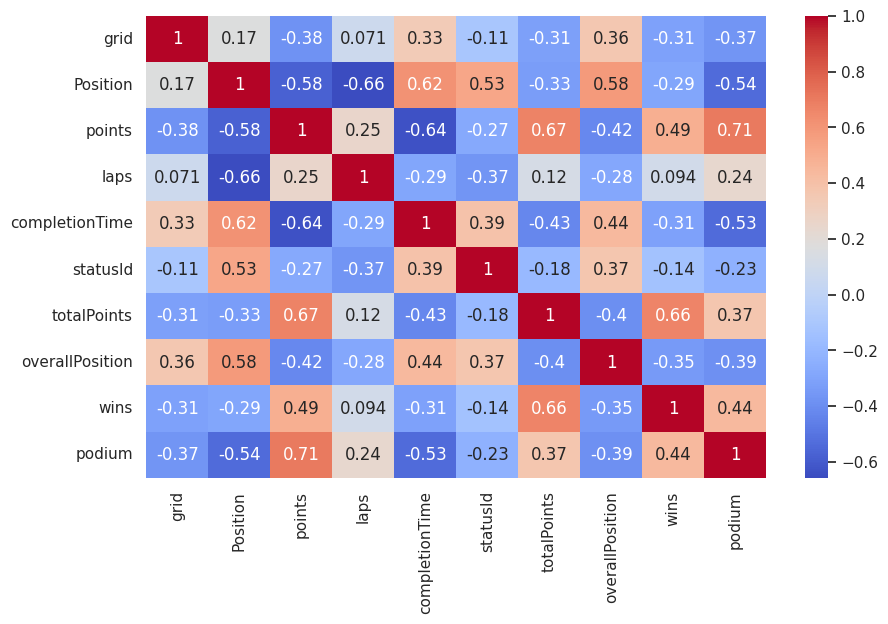

In [91]:
# Calculate correlation matrix
correlation_matrix = final_dataset.corr()

# Identify columns where correlation with 'podium' is between -0.2 and 0.2
columns_to_drop = correlation_matrix.index[
    (correlation_matrix['podium'] < 0.2) & (correlation_matrix['podium'] > -0.2)
]

# Drop these columns from the dataset
final_dataset = final_dataset.drop(columns=columns_to_drop)

sns.set(rc={'figure.figsize': (10, 6)})
print("Columns dropped:", list(columns_to_drop))

sns.heatmap(final_dataset.corr(), annot=True, cmap='coolwarm')

# SVM SECTION

In [92]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [93]:
final_dataset = final_dataset.drop(columns=['Position','overallPosition'])

In [94]:
X = final_dataset.drop(columns=['podium'])
y = final_dataset['podium']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm from scratch DO NOT RUN ON FULL DATASET

In [95]:
from sklearn.metrics.pairwise import polynomial_kernel

class SimpleSVM:
    def __init__(self, degree=3, coef0=1, C=None):
        self.degree = degree
        self.coef0 = coef0
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = polynomial_kernel(X, X, degree=self.degree, coef0=self.coef0)

        P = np.outer(y, y) * K
        q = -np.ones(n_samples)
        A = y.reshape(1, -1)
        b = np.array([0.0])

        G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
        h = np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C if self.C else np.inf))

        from cvxopt import matrix, solvers
        solvers.options['show_progress'] = False
        P = matrix(P)
        q = matrix(q)
        G = matrix(G)
        h = matrix(h)
        A = matrix(A, (1, n_samples), 'd')
        b = matrix(b)

        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.ravel(solution['x'])

        sv = alphas > 1e-5
        self.alphas = alphas[sv]
        self.support_vectors_ = X[sv]
        self.support_vector_labels_ = y[sv]
        self.b = np.mean(
            [
                y_k - np.sum(self.alphas * self.support_vector_labels_ * K[i][sv])
                for i, y_k in enumerate(self.support_vector_labels_)
            ]
        )

    def predict(self, X):
        K = polynomial_kernel(X, self.support_vectors_, degree=self.degree, coef0=self.coef0)
        return np.sign(np.dot(K, self.alphas * self.support_vector_labels_) + self.b)

In [96]:
# accuracies=[]
# for i in range(1,11):
#     clf = SimpleSVM(degree=i, C=1)

#     # Ensure X_train is a numpy array of floats
#     naya_X_train = np.array(X_train, dtype=float)

#     # Convert y_train to numerical format
#     naya_y_train = np.array(y_train, dtype=float)

#     # Train the model
#     clf.fit(naya_X_train, naya_y_train)

#     # Predictions
#     naya_X_test = np.array(X_test, dtype=float)  # Ensure X_test is also a numpy array
#     y_pred = clf.predict(naya_X_test)

#     # Evaluate Accuracy
#     accuracies.append(accuracy_score(y_test, y_pred))

# plt.plot(range(1,11), accuracies, marker='o')
# plt.xlabel('Degree of Polynomial Kernel')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Degree of Polynomial Kernel')
# plt.xticks(range(1,11))  # Ensure each degree value is shown on x-axis
# plt.grid(True)
# plt.show()


svm using library functions

In [97]:
# Train SVM with linear kernel
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [98]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9652591170825335


# logistic regression

logistic regression from scratch

In [99]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.special import expit  # Stable sigmoid

class LogisticRegressionImproved:
    def __init__(self, learning_rate=0.1, epochs=5000, lambda_=0.01, degree=1):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_ = lambda_  # Regularization parameter
        self.degree = degree  # Polynomial degree
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Scale and add polynomial features
        self.scaler = StandardScaler()
        X = self.scaler.fit_transform(X)
        if self.degree > 1:
            poly = PolynomialFeatures(degree=self.degree, include_bias=False)
            X = poly.fit_transform(X)
            self.poly = poly  # Save poly for use in predictions

        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = expit(linear_model)

            dw = (1 / m) * np.dot(X.T, (predictions - y)) + (self.lambda_ / m) * self.weights
            db = (1 / m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Apply same scaling and polynomial transformation
        X = self.scaler.transform(X)
        if self.degree > 1:
            X = self.poly.transform(X)

        linear_model = np.dot(X, self.weights) + self.bias
        predictions = expit(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in predictions])


In [100]:
model2 = LogisticRegressionImproved(learning_rate=0.1, epochs=10000, degree=2)
model2.fit(X_train, y_train)

# Predictions
y_pred = model2.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.015355086372360844


logistic regression using library function

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9445297504798464


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)  # Random state ensures reproducibility
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.980806142034549


In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the neural network
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                      max_iter=500, random_state=42)

# Train the neural network
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.981957773512476
